# 特徴量エンジニアリング
最良のデータ表現を模索すること
連続値特徴量:データポイント。ピクセルの明るさや花の大木さんなど

カテゴリ特徴量：離散値特徴量ともいう。製品やブランドの色、販売されている部門など連続的に変化しないもの。

カテゴリ変数は数値に直さないと意味を出せない
one hot encoding（ダミー変数）
カテゴリ変数を0と1の値を持つ新しい特徴量に置き換える
pandas.get_dummies()
*訓練データとテストデータのダミー変数が一致するよう注意が必要。＝＞訓練とテストのの双方が入ったdataFrameにダミーを作成する。
*数値は連続値として扱うのでカテゴリ変数に離散血が入っている場合は別途処理が必要


In [5]:
import pandas as pd
import mglearn
import os

adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names = ['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
display(data.head())
print(type(data))



,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


<class 'pandas.core.frame.DataFrame'>


In [6]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [7]:
print(list(data.columns))

['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']


In [10]:
data_dummies = pd.get_dummies(data)
print(data_dummies.columns)

Index(['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'gender_ Female', 'gender_ Male',
       'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
   

In [11]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [14]:
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print(X.shape,y.shape)

(32561, 44) (32561,)


In [17]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8136592556197028

In [18]:
demo_df = pd.DataFrame({'Integer Feature': [0,1,2,1],
                       'Xategorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Xategorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [19]:
display(pd.get_dummies(demo_df))

,Integer Feature,Xategorical Feature_box,Xategorical Feature_fox,Xategorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [26]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df,columns=['Integer Feature', 'Xategorical Feature'])
       )

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Xategorical Feature_box,Xategorical Feature_fox,Xategorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


In [41]:
import numpy as np
import matplotlib as mp
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X,y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

array([-0.39794858,  0.71057755,  0.41392867, -0.34838379, -1.60200406,
       -1.31357099, -0.124268  ,  1.13660585,  0.22684365, -0.10700113,
       -0.54427035,  1.0938912 ,  1.22856895, -0.89714157, -1.39417599,
       -0.9492085 , -0.43835025,  0.19034234, -0.89924205, -0.88012364,
        0.70430307, -1.30000147, -0.13995175, -0.48537014, -1.27425783,
        0.91123781, -1.47153912, -0.19092529,  0.59550252, -0.66166641,
        1.53153925, -1.40042495, -0.75159805,  0.82173954, -0.05444761,
        1.36162551, -0.05617721,  0.13915737, -0.02248933, -0.52425604,
       -1.32442468, -0.6565562 , -0.33342093,  1.40971987, -0.09111024,
       -0.31120403,  0.62720334, -0.40910817,  0.88383737, -0.32926085,
        0.43219944,  0.69953405,  0.91757823,  0.9072161 , -0.12575441,
        0.97771746, -1.54756059, -1.0995268 , -1.32567079,  0.68478903,
       -0.95196998, -0.48985511,  1.89265222, -0.8991673 , -0.11595025,
        1.20894039, -2.2420626 ,  1.4112213 , -0.79263824,  1.46

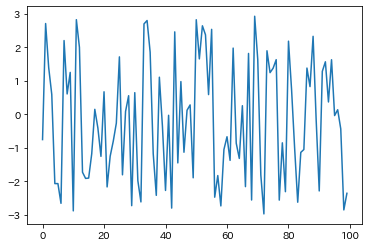

In [51]:
mp.pyplot.plot(X)
y

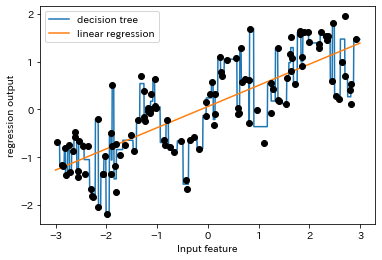

In [55]:
import matplotlib.pyplot as plt
reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line,reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),label="linear regression")
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [61]:
bins = np.linspace(-3,3,11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [63]:
which_bin = np.digitize(X,bins=bins)
print(X[:5])
print(which_bin[:5])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
[[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [65]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:,5])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [69]:
X_binned.shape

(120, 10)

Text(0.5, 0, 'input feature')

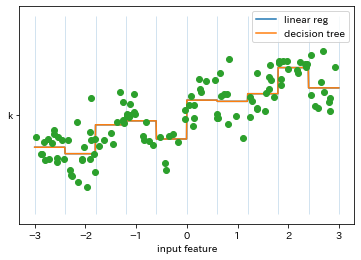

In [72]:
line_binned = encoder.transform(np.digitize(line,bins=bins))
reg = LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_binned), label='linear reg')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line,reg.predict(line_binned), label='decision tree')
plt.plot(X[:,0],y,'o','k')
plt.vlines(bins,-3,3,linewidth=1,alpha=.2)
plt.legend(loc="best")
plt.xlabel('input feature')

## 交互作用と多項式
特徴量表現をより豊かにする

実際に一次元の特徴量の2乗や3乗の項を追加したものは線形回帰モデルの精度を向上させる(PolynomialFeaturesなど）

In [73]:
X_combined = np.hstack([X,X_binned])


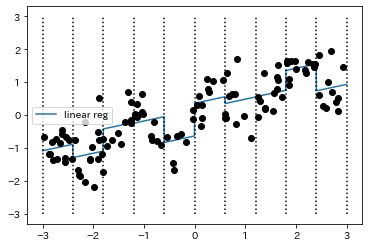

In [76]:
reg = LinearRegression().fit(X_combined,y)
line_combined = np.hstack([line,line_binned])
plt.plot(line,reg.predict(line_combined),label='linear reg')

for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
plt.legend(loc='best')
plt.plot(X[:,0],y,'o',c='k')

In [77]:
X_product = np.hstack([X_binned,X*X_binned])
print(X_product.shape)

(120, 20)


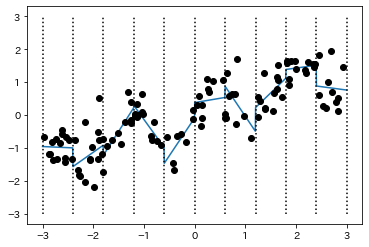

In [83]:
reg = LinearRegression().fit(X_product,y)
line_product = np.hstack([line_binned,line * line_binned])
plt.plot(line,reg.predict(line_product),label='linear regression')

for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
plt.plot(X[:,0],y,'o',c='k')

In [85]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10,include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)


In [86]:
X_poly.shape

(120, 10)

In [87]:
print(X[:5])
print(X_poly[:5])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [88]:
poly.get_feature_names()

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

Text(0.5, 0, 'Input feature')

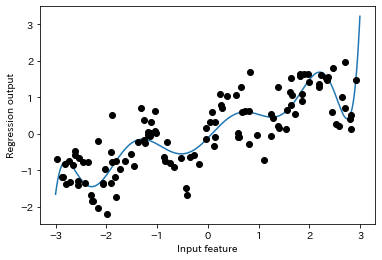

In [89]:
reg = LinearRegression().fit(X_poly,y)
line_poly = poly.transform(line)
plt.plot(line,reg.predict(line_poly),label='polynomial')
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')

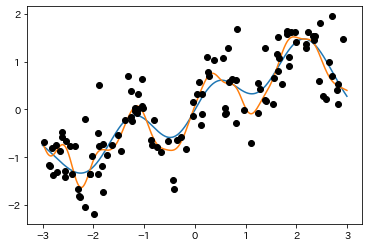

In [92]:
from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line,svr.predict(line),label='SVR gammma={}'.format(gamma))

plt.plot(X[:,0],y,'o',c='k')

In [93]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train,X_test,y_train,y_test = train_test_split(
boston.data,boston.target,random_state=0)

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [95]:
scaler = MinMaxScaler()
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(X_train_poly.shape)
print(X_test_poly.shape)

(379, 105)
(127, 105)


In [99]:
poly.get_feature_names()

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x8 x12',
 'x9^2',
 'x9 x10',
 'x9 x11',
 'x9 x12',
 'x10^2',
 'x10 x11',
 'x10 x1

In [100]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled,y_train)
print(ridge.score(X_test_scaled,y_test))
ridge = Ridge().fit(X_train_poly,y_train)
print(ridge.score(X_test_poly,y_test))

0.6214583227921036
0.7534782020980577


In [102]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled,y_train)
print(rf.score(X_test_scaled,y_test))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly,y_train)
print(rf.score(X_test_poly,y_test))

0.7899619301431251
0.7639008212595932


# 単変量非線形変換
log,sin,expを用いる。
データの相対的なスケールを修正してくれるのでモデリングしやすくなる=>ガウス分布に従わせると良い。

In [103]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org,w)


<BarContainer object of 141 artists>

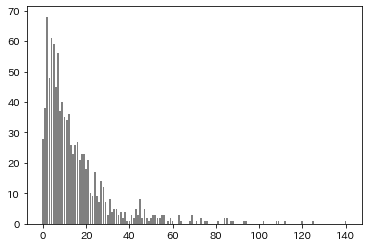

In [108]:
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)),bins,color='grey')


In [112]:
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
score = Ridge().fit(X_train,y_train).score(X_test,y_test)
print(score)

0.6224186236310758


In [113]:
X_train_log = np.log(X_train+1)
X_test_log = np.log(X_test+1)


(array([19.,  0.,  0., 31.,  0., 56.,  0., 37., 41., 44., 67., 29., 82.,
        50., 60., 65., 48., 32., 23., 21., 19.,  7.,  7.,  8.,  4.]),
 array([0.        , 0.19183162, 0.38366324, 0.57549487, 0.76732649,
        0.95915811, 1.15098973, 1.34282135, 1.53465297, 1.7264846 ,
        1.91831622, 2.11014784, 2.30197946, 2.49381108, 2.68564271,
        2.87747433, 3.06930595, 3.26113757, 3.45296919, 3.64480081,
        3.83663244, 4.02846406, 4.22029568, 4.4121273 , 4.60395892,
        4.79579055]),
 <BarContainer object of 25 artists>)

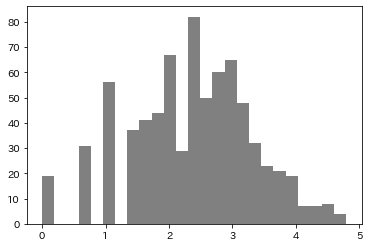

In [114]:
plt.hist(X_train_log[:,0],bins=25,color='grey')

In [115]:
score = Ridge().fit(X_train_log,y_train).score(X_test_log,y_test)
print(score)


0.8749342372887815


# 自動特徴量選択